In [77]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import warnings

%matplotlib inline
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)

import matplotlib.pyplot as plt
import mglearn

In [78]:
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


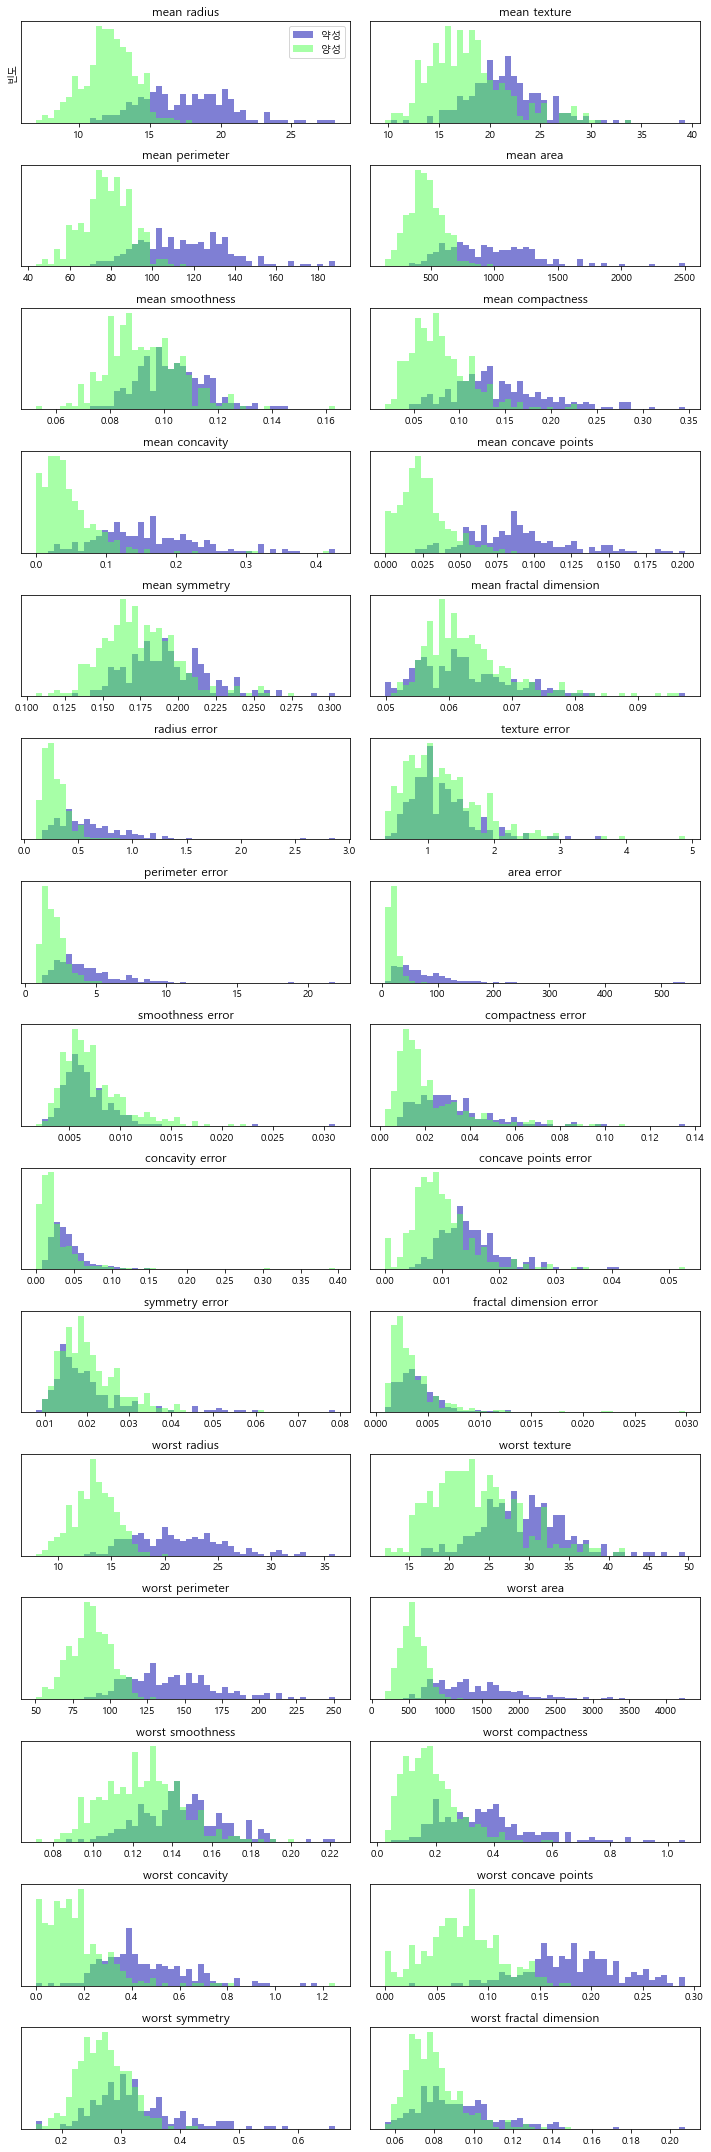

In [97]:
fig, axes = plt.subplots(15,2, figsize=(10,30))
malignant = df[df['target'] == 0]
beniign = df[df['target'] == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(df.iloc[:,i], bins=50)
    ax[i].hist(malignant.iloc[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(beniign.iloc[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(df.columns[i])
    ax[i].set_yticks(())
ax[0].set_ylabel('빈도')        
ax[0].legend(['약성','양성'], loc='best')    
fig.tight_layout()

In [19]:
scaler = StandardScaler()
scaler.fit(df)
X_scaled = scaler.transform(df)

In [20]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

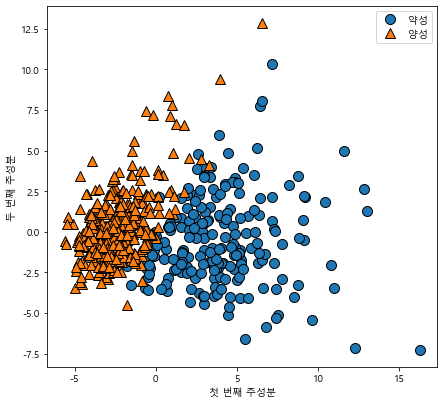

In [56]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
plt.figure(figsize=(7,7))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], df['target'])
plt.legend(['약성','양성'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.show()

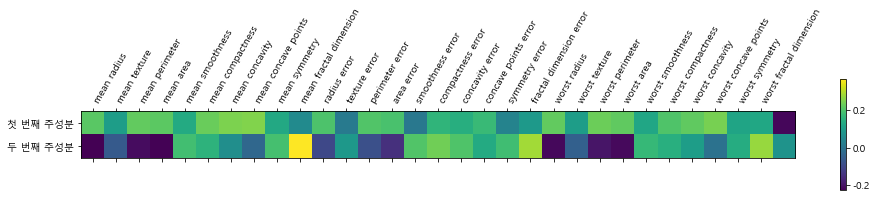

In [57]:
df = df.copy()
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(df.columns)-1),
          df.columns[0:30], rotation=60, ha='left')
plt.show()

***해석***

    - 먼저 PCA는 비지도학습이기 때문에, 회전축을 찾을 때 특정정보를 활요했다고 볼 수 없다. 단지 데이터 간의 
    상관관계만을 고려한다. 

    - PCA를 통해 얻게 된 결과로, 두 축을 해석하기는 쉽지 않다. 
    주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이며, PCA 객체가 합습될 때 속성이 
    저장된 component_를 통해 확인해볼 수 있다.
    
    - 위 분석의 경우, 첫번째 주성분은 모두 부호가 같은을 확인할 수 있다. 
    단, 모두 양수기는 하지만, 주성부의 화살표 방향은 큰 의미가 없으며 단지 모든 특성사이에 공통의 상호관계가 
    있다는 것만을 확인할 수 있다는 것이다.
    더불어, 한 특성의 값이 커지면 다른 특성의 값들도 같이 높아질 것이다.
    두 번째 주성분은 부호가 섞여 있고 두 주성분 모두 30개의 특성이 있다. 